In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import sys
from PIL import Image
from tensorflow import keras

In [2]:
base_dir = os.getcwd()+"/data"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [2]:
batch_size = 32
image_size = 160
# Rescale all images by 1./255 and apply image augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


NameError: name 'keras' is not defined

In [4]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                train_dir,  # Source directory for the training images
                target_size=(image_size, image_size),  
                batch_size=batch_size,
                # Since we use binary_crossentropy loss, we need binary labels
                class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
                validation_dir, # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='categorical')

Found 5364 images belonging to 6 classes.
Found 1338 images belonging to 6 classes.


In [1]:
IMG_SHAPE = (image_size, image_size, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

NameError: name 'image_size' is not defined

In [6]:
base_model.trainable = False

In [7]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (Activation)      (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32)        128       
_________________________________________________________________
conv_dw_1_relu (Activation)  (None, 80, 80, 32)        0         
__________

In [8]:
model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(6, activation='softmax')
])

In [9]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_160 (Model)   (None, 5, 5, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 6150      
Total params: 3,235,014
Trainable params: 6,150
Non-trainable params: 3,228,864
_________________________________________________________________


In [11]:
len(model.trainable_variables)

2

In [12]:
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              workers=4,
                              validation_data=validation_generator, 
                              validation_steps=validation_steps)

Epoch 1/10
167/167 [==============================]167/167 [==============================] - 394s 2s/step - loss: 1.2797 - acc: 0.5587 - val_loss: 1.4549 - val_acc: 0.5465

Epoch 2/10
167/167 [==============================]167/167 [==============================] - 419s 3s/step - loss: 0.3193 - acc: 0.9480 - val_loss: 1.0449 - val_acc: 0.7213

Epoch 3/10
167/167 [==============================]167/167 [==============================] - 418s 3s/step - loss: 0.1116 - acc: 0.9899 - val_loss: 0.9237 - val_acc: 0.7688

Epoch 4/10
167/167 [==============================]167/167 [==============================] - 411s 2s/step - loss: 0.0503 - acc: 0.9976 - val_loss: 0.8482 - val_acc: 0.7825

Epoch 5/10
167/167 [==============================]167/167 [==============================] - 416s 2s/step - loss: 0.0295 - acc: 0.9981 - val_loss: 0.7627 - val_acc: 0.7940

Epoch 6/10
167/167 [==============================]167/167 [==============================] - 408s 2s/step - loss: 0.0177 - acc: 0

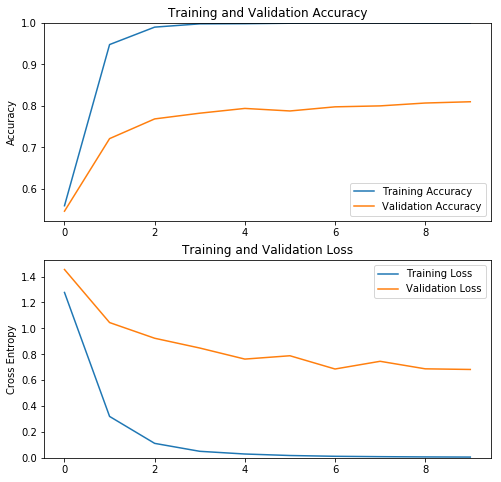

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()


In [15]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [16]:
model.save_weights("model.h5")

In [19]:
# base_model.trainable = True

In [20]:
# # Let's take a look to see how many layers are in the base model
# print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  82


In [21]:
# # Fine tune from this layer onwards
# fine_tune_at = 70

# # Freeze all the layers before the `fine_tune_at` layer
# for layer in base_model.layers[:fine_tune_at]:
#   layer.trainable =  False

In [22]:
# model.compile(loss='categorical_crossentropy',
#               optimizer = tf.keras.optimizers.RMSprop(lr=2e-5),
#               metrics=['accuracy'])

In [23]:
# model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_160 (Model)   (None, 5, 5, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 6150      
Total params: 3,235,014
Trainable params: 1,600,006
Non-trainable params: 1,635,008
_________________________________________________________________


In [24]:
# len(model.trainable_variables)

14

In [25]:
# history_fine = model.fit_generator(train_generator, 
#                                    steps_per_epoch = steps_per_epoch,
#                                    epochs=epochs, 
#                                    workers=4,
#                                    validation_data=validation_generator, 
#                                    validation_steps=validation_steps)

Epoch 1/10
94/94 [==============================]94/94 [==============================] - 368s 4s/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0538 - val_acc: 0.9875

Epoch 2/10
94/94 [==============================]94/94 [==============================] - 368s 4s/step - loss: 6.3096e-04 - acc: 1.0000 - val_loss: 0.0013 - val_acc: 1.0000

Epoch 3/10
94/94 [==============================]94/94 [==============================] - 404s 4s/step - loss: 4.1073e-04 - acc: 1.0000 - val_loss: 1.2539e-04 - val_acc: 1.0000

Epoch 4/10
94/94 [==============================]94/94 [==============================] - 396s 4s/step - loss: 1.4760e-04 - acc: 1.0000 - val_loss: 6.0510e-05 - val_acc: 1.0000

Epoch 5/10
94/94 [==============================]94/94 [==============================] - 399s 4s/step - loss: 6.4822e-05 - acc: 1.0000 - val_loss: 2.5963e-05 - val_acc: 1.0000

Epoch 6/10
94/94 [==============================]94/94 [==============================] - 425s 5s/step - loss: 3.0874e-05 

In [26]:
# acc += history_fine.history['acc']
# val_acc += history_fine.history['val_acc']

# loss += history_fine.history['loss']
# val_loss += history_fine.history['val_loss']

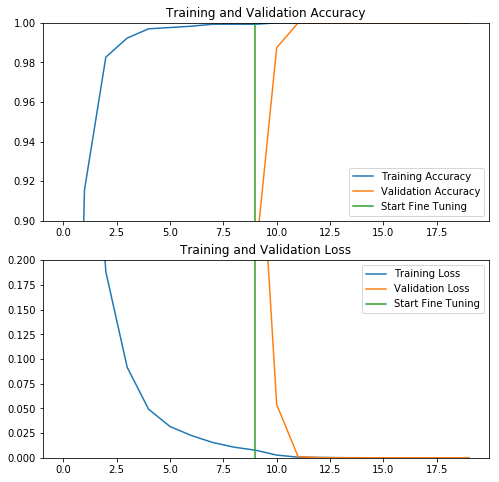

In [27]:
# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.ylim([0.9, 1])
# plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(2, 1, 2)
# plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.ylim([0, 0.2])
# plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()